# Importing Data
1. Get the EEG/MEG dataset from https://mne.tools/0.11/auto_tutorials/plot_introduction.html?highlight=eeg#access-raw-data

2. Import data using standard import functions


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from mne import filter
from mne.datasets import sample
from IPython.display import Image
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap, compute_proj_ecg, compute_proj_eog)
import time
%matplotlib inline

In [47]:
data_path = sample.data_path()
##Unfiltered data
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
##Filtered data
#raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

C:\Users\Pragyat\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif


# Checking Data Structures:
3. What are the various information in the data?
   We can take the information by using "raw.info" method.
4. How they are structured?
   Different type of information is stored in different type of data structures like "info is in dictionary format" , "ch-names is in string" , "times is in array", " low and high pass filters are in float", etc. 

In [48]:
raw = mne.io.Raw(raw_fname)
print(raw.info)
print(raw)

Opening raw data file C:\Users\Pragyat\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
<Info | 24 non-empty fields
    acq_pars : str | 13886 items
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 49 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass :

5. Can you extract each of them separately? How?
 Yes, we can by using raw.info('key of dictionary') command.

In [49]:
raw.info['projs']

[<Projection  |  PCA-v1, active : False, n_channels : 102>,
 <Projection  |  PCA-v2, active : False, n_channels : 102>,
 <Projection  |  PCA-v3, active : False, n_channels : 102>]

6. Can you list all the channel names? 
Yes

In [50]:
print(raw.ch_names)
print("Length of the channel names is:"+ str(len(raw.ch_names)))

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

7. List only all EEG channel labels?

In [51]:
eeg_ch = mne.pick_types(raw.info, meg=False, eeg=True, stim=False,eog=False,
                       exclude='bads')
print(eeg_ch)
print(raw.ch_names[315:375])

[315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 368 369
 370 371 372 373 374]
['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021', 'EEG 022', 'EEG 023', 'EEG 024', 'EEG 025', 'EEG 026', 'EEG 027', 'EEG 028', 'EEG 029', 'EEG 030', 'EEG 031', 'EEG 032', 'EEG 033', 'EEG 034', 'EEG 035', 'EEG 036', 'EEG 037', 'EEG 038', 'EEG 039', 'EEG 040', 'EEG 041', 'EEG 042', 'EEG 043', 'EEG 044', 'EEG 045', 'EEG 046', 'EEG 047', 'EEG 048', 'EEG 049', 'EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']


8. How are the data structure of channel labels different from the time series?
. Channel Lables: List of strings where as
. Time series: it is n dimentional array

9. Can you find any meta information about the data?
Yes, by using "mne.info()" method we extracted all the meta data information

10. What were the filters already applied in the data during recording?

High pass filtering at 0.1 Hz.
Low pass filtering at 172.17 Hz.

In [52]:
print('The high pass cutoff is='+str(raw.info['highpass']))
print('The low pass cutoff is='+str(raw.info['lowpass']))

The high pass cutoff is=0.10000000149011612
The low pass cutoff is=172.17630004882812


11. Do you find something like channel type? What are the types in your signal?

Yes, by using "chs:list" command we get Gradiometer(GRAD): 204,Magnetometer(MAG):102,Stimulas channel(STI):9,EEG=60,EOG=1

# Plotting RAW data
12. Plot the raw data - grouped by  channel type (MEG, EEG, STI channels) - How do they look? \\
a) What is the typical amplitude of different channel types?............................. : 
    ECG=60-120 microvolts............
    MEG=120 pikotesla..........
    EOG=50-3500 microvolt.............
    STI=0-5v.............
b) Do you find any large fluctuations? If yes, what is the probable source?............. The main fluctuations seems to be because of ECG and EOG................
c) Can you find and plot the ECG/EOG channels?....................
d) How does the STI channel differ from other channels?


In [56]:
# Can you find and plot the ECG/EOG channels?
#Can you find and plot the ECG/EOG channels?
eog = mne.pick_types(raw.info, meg=False, eeg=False, stim=False,eog=True,
                       exclude='bads')
print(eog)

[375]


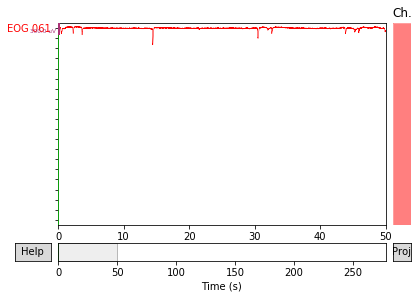

In [57]:
x=mne.viz.plot_raw(raw, events=None, duration=50, start=0.0, n_channels=20, bgcolor='w', color='red', bad_color=(0.8, 0.8, 0.8), event_color='cyan', scalings=None, remove_dc=True, order=[375], show_options=False, title=None, show=True, block=False, highpass=None, lowpass=None, filtorder=4, clipping=None, show_first_samp=False, proj=True, group_by='type', butterfly=False, decim='auto', noise_cov=None, event_id=None, show_scrollbars=True, verbose=None)

13. Can you find an STI channel? What is it?


In [ ]:
sti = mne.pick_types(raw.info, meg=False, eeg=False, stim=True,eog=False,
                       exclude='bads')
print(sti)

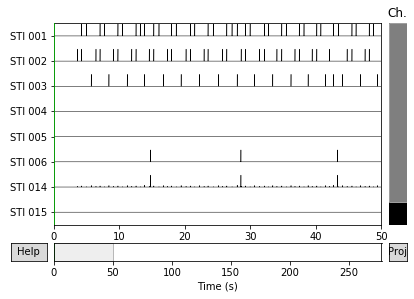

In [58]:
x = mne.viz.plot_raw(raw, events=None, duration=50,n_channels=8, bgcolor='w', bad_color=(0.8, 0.8, 0.8), event_color='cyan', scalings=None, remove_dc=True, order=[306,307,308,309,310,311,312,313,314], show_options=False, title=None, show=True, block=False, highpass=None, lowpass=None, filtorder=4, clipping=None, show_first_samp=False, proj=True, group_by='type', butterfly=False, decim='auto', noise_cov=None, event_id=None, show_scrollbars=True, verbose=None)


In [59]:
meg = mne.pick_types(raw.info, meg=True, eeg=False, stim=False,eog=False,
                       exclude='bads')
print(meg)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

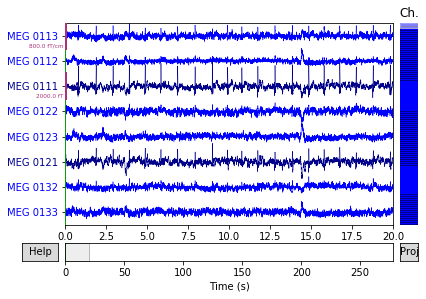

In [67]:
m = np.arange(0,306)
x = mne.viz.plot_raw(raw, events=None, duration=20,n_channels=8, bgcolor='w', bad_color=(0.8, 0.8, 0.8), event_color='cyan', scalings=None, remove_dc=True, order=[m], show_options=False, title=None, show=True, block=False, highpass=None, lowpass=None, filtorder=4, clipping=None, show_first_samp=False, proj=True, group_by='type', butterfly=False, decim='auto', noise_cov=None, event_id=None, show_scrollbars=True, verbose=None)

# Filtering Data

14. Separate out only the EEG channels for this exercise.


[315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 368 369
 370 371 372 373 374]
59


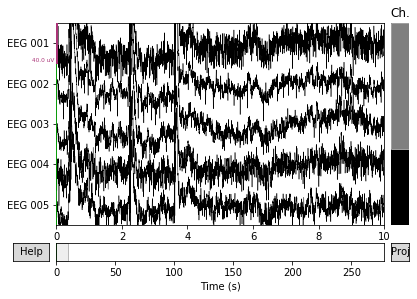

In [70]:
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False,eog=False,
                       exclude='bads')
print(picks)
print(len(picks))
p = np.arange(315,323)
d = raw.plot(order=[p],n_channels=5)

15.Run both IIR and FIR bandpass filters 
#How long does it take? .......... FIR: 2.20sec.......
IIR: 1.10sec
#How different are the outputs?
#Ans: As per my observations the output of the IIR filter seems to be smotther.

In [71]:
#FIR METHOD
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False,eog=False,
                       exclude='bads')
raw.load_data()
orig_raw = raw.copy()
start_time = time.time()
rawfe=raw.filter(l_freq=0.1,h_freq=40,picks=picks,method='fir')
print("--- %s seconds ---" % (time.time() - start_time))
z=rawfe.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)
b=rawfe.plot(order=[315, 316, 317, 318, 319, 320, 321, 322],n_channels=5,color='blue')

Reading 0 ... 166799  =      0.000 ...   277.714 secs...


MemoryError: Unable to allocate array with shape (376, 166800) and data type float64